<a href="https://colab.research.google.com/github/Dung1702/tr-i-c-y/blob/main/food_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [86]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.python.keras.utils.data_utils import Sequence
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [87]:
train_path = '/content/drive/MyDrive/trai_cay'
valid_path = '/content/drive/MyDrive/trai_cay'
test_path = '/content/drive/MyDrive/trai_cay'

In [88]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)



train_batches = train_datagen.flow_from_directory(train_path, target_size=(224, 224), 
                                                  batch_size=10, class_mode='categorical')

validation_batches = test_datagen.flow_from_directory(valid_path, target_size=(224, 224),
                                                      batch_size=10, class_mode='categorical')

test_batches = test_datagen.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 200 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [89]:
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

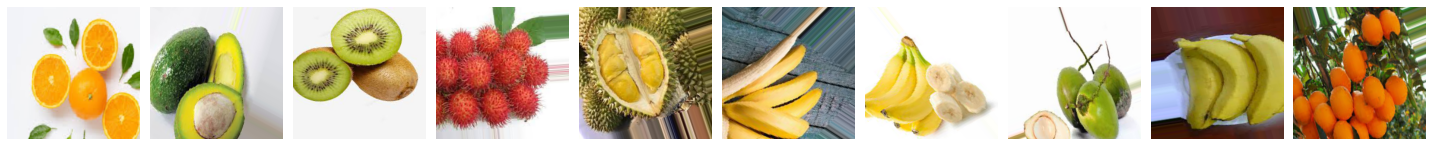

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [90]:
plotImages(imgs)
print(labels)

In [91]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Flatten(),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 28, 28, 128)     

In [92]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=validation_batches,
          validation_steps=len(validation_batches), epochs=10, verbose=1)

Epoch 1/10
20/20 [==============================] - 59s 3s/step - loss: 2.3329 - accuracy: 0.1150 - val_loss: 2.2594 - val_accuracy: 0.2500
Epoch 2/10
20/20 [==============================] - 4s 178ms/step - loss: 2.0569 - accuracy: 0.2300 - val_loss: 1.7144 - val_accuracy: 0.3500
Epoch 3/10
20/20 [==============================] - 3s 169ms/step - loss: 1.7375 - accuracy: 0.3300 - val_loss: 1.3808 - val_accuracy: 0.4300
Epoch 4/10
20/20 [==============================] - 3s 169ms/step - loss: 1.5496 - accuracy: 0.3950 - val_loss: 1.2990 - val_accuracy: 0.5450
Epoch 5/10
20/20 [==============================] - 3s 169ms/step - loss: 1.3608 - accuracy: 0.4400 - val_loss: 1.1385 - val_accuracy: 0.5500
Epoch 6/10
20/20 [==============================] - 3s 169ms/step - loss: 1.2686 - accuracy: 0.5350 - val_loss: 0.9862 - val_accuracy: 0.6300
Epoch 7/10
20/20 [==============================] - 3s 167ms/step - loss: 1.1727 - accuracy: 0.5400 - val_loss: 0.8772 - val_accuracy: 0.6900
Epoch 8/

In [93]:
model.save('trai_cay.h5')


In [94]:
from keras.models import load_model

model5 = load_model('trai_cay.h5')

(1, 224, 224, 3)

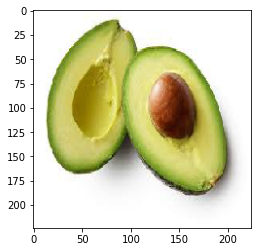

In [95]:
from keras.preprocessing.image import load_img,img_to_array
img=load_img('/content/drive/MyDrive/trai_cay/bo/images (2).jpg',target_size=(224,224))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,224,224,3)
img=img.astype('float32')
img=img/255
img.shape

In [96]:
a=np.argmax(model5.predict(img),axis=1)
if a == 0:
  print('avocado')
if a == 1:
  print('orange')
if a == 2:
  print('rambutan')
if a == 3:
  print('banana')
if a == 4:
  print('kiwi')
if a == 5:
  print('com_tam')
if a == 6:
  print('goi_cuon')
if a == 7:
  print('mi_quang')
if a == 8:
  print('nem_ran')
if a == 9:
  print('Pho')


com_tam
